<a href="https://colab.research.google.com/github/bayusiddik/Covid-19-Visualization/blob/main/Visual_Analysis_of_COVID_19's_Global_Spread_and_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visual Analysis of COVID-19's Global Spread and Effects**

The data used starts from the date 22/01/2020 - 27/07/2020 or 186 days.

## **1. Install Libraries**

In [ ]:
# Library for creating animated bar chart visualisations
!pip install bar_chart_race

# Library to get continent name from country name
!pip install pandas pycountry-convert

## **2. Import libraries**

In [ ]:
import pandas as pd
import pycountry_convert as pc
import bar_chart_race as bcr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

## **3. Read Dataset**

Clean Complete Data

In [ ]:
# Clean Complete Data

url = 'https://media.githubusercontent.com/media/bayusiddik/Covid19-Visualizations/refs/heads/main/Dataset/covid_19_clean_complete.csv'
full_table = pd.read_csv(url, parse_dates=['Date'])
# full_table['Date'] = pd.to_datetime(full_table['Date'])
full_table.sample(10)

Province/State  Country/Region        Lat        Long       Date  \
36237    Isle of Man  United Kingdom  54.236100   -4.548100 2020-06-08   
40995            NaN         Bahamas  25.025885  -78.035889 2020-06-27   
9366             NaN      Mozambique -18.665695   35.529562 2020-02-26   
48662            NaN          Gambia  13.443200  -15.310100 2020-07-26   
30877         Yunnan           China  24.974000  101.487000 2020-05-19   
40247      Guangdong           China  23.341700  113.424400 2020-06-24   
47868  French Guiana          France   3.933900  -53.125800 2020-07-23   
22122            NaN    South Africa -30.559500   22.937500 2020-04-15   
12812            NaN         Belgium  50.833300    4.469936 2020-03-11   
10520       Zhejiang           China  29.183200  120.093400 2020-03-02   

       Confirmed  Deaths  Recovered  Active       WHO Region  
36237        336      24        312       0           Europe  
40995        104      11         87       6         Americas  
9366           0       0          0       0           Africa  
48662        277       6         60     211           Africa  
30877        185       2        183       0  Western Pacific  
40247       1635       8       1621       6  Western Pacific  
47868       7086      40       5376    1670           Europe  
22122       2506      34        410    2062           Africa  
12812        314       3          1     310           Europe  
10520       1206       1       1069     136  Western Pacific

## **4. Exploratory Data Analysis**

###  4.1. Check Info Dataset

In [ ]:
# Data info

full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


The dataset used contains 49,068 rows and 10 columns, with the following descriptions for each column:

*   **Province/State :** This column stores the names of provinces or states, with an object data type.
*   **Country/Region :** Stores the name of the country or region, with an object data type.
*   **Lat :** Stores the latitude coordinates with a float64 data type.
*   **Long :** Stores the longitude coordinates with a float64 data type.
*   **Date :** Stores the date with a datetime64 data type.
*   **Confirmed :** Stores the number of confirmed cases with an int64 data type.
*   **Deaths :** Stores the confirmed number of deaths with an int64 data type.
*   **Recovered :** Stores the number of recovered patients with an int64 data type.
*   **Active :** Stores the number of active cases with an int64 data type.
*   **WHO Region :** Stores information on the WHO region, with an object data type.



In [ ]:
# Data overview

full_table.describe().round(2)

Lat      Long                 Date   Confirmed     Deaths  \
count  49068.00  49068.00                49068    49068.00   49068.00   
mean      21.43     23.53  2020-04-24 12:00:00    16884.90     884.18   
min      -51.80   -135.00  2020-01-22 00:00:00        0.00       0.00   
25%        7.87    -15.31  2020-03-08 18:00:00        4.00       0.00   
50%       23.63     21.75  2020-04-24 12:00:00      168.00       2.00   
75%       41.20     80.77  2020-06-10 06:00:00     1518.25      30.00   
max       71.71    178.06  2020-07-27 00:00:00  4290259.00  148011.00   
std       24.95     70.44                  NaN   127300.21    6313.58   

        Recovered      Active  
count    49068.00    49068.00  
mean      7915.71     8085.01  
min          0.00      -14.00  
25%          0.00        0.00  
50%         29.00       26.00  
75%        666.00      606.00  
max    1846641.00  2816444.00  
std      54800.92    76258.90

In [ ]:
# Display statistical summaries for categorical columns

full_table.describe(include = 'object')

Province/State Country/Region WHO Region
count                          14664          49068      49068
unique                            78            187          6
top     Australian Capital Territory          China     Europe
freq                             188           6204      15040

- The **Province/State** column contains **14,664** non-null entries with **78** unique provinces or states. The most frequently occurring province is the **Australian Capital Territory**, appearing **188** times.

- The **Country/Region** column covers all **49,068** entries in the dataset and includes **187** unique countries or regions. The most frequent country is **China**, which appears **6,204** times.

- The **WHO Region** column also includes all **49,068** entries, with **6** unique WHO regions. The most frequently occurring WHO region is **Europe**, appearing **15,040** times.

In [ ]:
# Show the first and the last date

print('The first date is: ', min(full_table['Date']))
print('The last date is:  ', max(full_table['Date']))

The first date is:  2020-01-22 00:00:00
The last date is:   2020-07-27 00:00:00


The data used spans from January 22, 2020, to July 27, 2020. This means the data covers a period of approximately 6 months or 186 days during the early stages of the COVID-19 pandemic.

In [ ]:
# Check for null data

full_table.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

There are 34,404 missing entries in the Province/State column of the dataset. This indicates a significant amount of missing data that needs to be addressed by performing dataset cleaning.

### 4.2. Cleaning Dataset

In [ ]:
# Renaming columns for better consistency and readability.
full_table.rename(columns={'Date': 'date',
                           'Province/State':'state',
                           'Country/Region':'country',
                           'Lat':'lat', 'Long':'long',
                           'Confirmed': 'confirmed',
                           'Deaths':'deaths',
                           'Recovered':'recovered',
                           'Active':'active',
                           'WHO Region' : 'region'
                           }, inplace=True)

In [ ]:
# Cases
cases = ['confirmed', 'deaths', 'recovered', 'active']

# Calculating the Total Cases = Confirmed + Deaths + Recovered
full_table['total_cases']=full_table['confirmed'] + full_table['deaths'] + full_table['recovered']

# Active Case = Confirmed - Deaths - Recovered
full_table['active'] = full_table['confirmed'] - full_table['deaths'] - full_table['recovered']

# Replacing Mainland China with just China
full_table['country'] = full_table['country'].replace('Mainland China', 'China')

# Filling missing values
full_table[['state']] = full_table[['state']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

full_table.sample(10)

state                country        lat        long  \
32701           Tianjin                  China  39.305400  117.323000   
48982                                 Pakistan  30.375300   69.345100   
16071                               Madagascar -18.766947   46.869107   
8896                                   Belarus  53.709800   27.953400   
7866   British Columbia                 Canada  53.726700 -127.647600   
42799                    Sao Tome and Principe   0.186400    6.613100   
3115                                     Burma  21.916200   95.956000   
30640                                     Fiji -17.713400  178.065000   
23236                                  Armenia  40.069100   45.038200   
40628                                   Norway  60.472000    8.468900   

            date  confirmed  deaths  recovered  active                 region  \
32701 2020-05-26        192       3        188       1        Western Pacific   
48982 2020-07-27     274289    5842     241026   27421  Eastern Mediterranean   
16071 2020-03-23         12       0          0      12                 Africa   
8896  2020-02-25          0       0          0       0                 Europe   
7866  2020-02-21          6       0          0       6               Americas   
42799 2020-07-03        719      13        267     439                 Africa   
3115  2020-02-02          0       0          0       0        South-East Asia   
30640 2020-05-18         18       0         15       3        Western Pacific   
23236 2020-04-20       1339      22        580     737                 Europe   
40628 2020-06-25       8788     249       8138     401                 Europe   

       total_cases  
32701          383  
48982       521157  
16071           12  
8896             0  
7866             6  
42799          999  
3115             0  
30640           33  
23236         1941  
40628        17175

In [ ]:
# Looking at the average total mortality for all cases

# Count the number of all cases
mortality_data = full_table.groupby(full_table['date'])[['confirmed', 'deaths', 'recovered', 'active']].sum().reset_index()

# Display the latest date of the dataframe
mortality_data = mortality_data[mortality_data['date']==max(mortality_data['date'])].reset_index(drop=True)

# Calculate the global mortality rate
mortality_data['global mortality'] = mortality_data['deaths'] / mortality_data['confirmed']

# Calculate the global mortality rate per 100 Confirmed Cases
mortality_data['deaths per 100 confirmed cases'] = mortality_data['global mortality'] * 100
mortality_data.style.background_gradient(cmap='Pastel1')

From the data, we can analyze that as of July 27, 2020, the COVID-19 pandemic had resulted in 16,480,485 confirmed cases worldwide. Tragically, there were 654,036 reported deaths due to this virus. However, amidst these grim statistics, 9,468,087 individuals had recovered from COVID-19. Despite this recovery, there remained 6,358,362 active cases that had not yet been declared either recovered or deceased. Furthermore, the global mortality rate reached approximately 3.97%, indicating that for every 100 confirmed positive cases, around 4 individuals lost their lives to this disease.

### 4.3. Country Wise Data

#### a. View confirmed cases, active cases, death cases, and recovered cases.

In [ ]:
# Retrieve data up to the latest date
full_table_latest = full_table[full_table['date'] == max(full_table['date'])].reset_index()

# Group the data for columns Confirmed, Deaths, Recovered with Country/Region
full_latest_grouped = full_table_latest.groupby(full_table_latest['country'])[['confirmed', 'deaths', 'recovered', 'active']].sum().reset_index()

# Create a dataframe sorted from the largest Confirmed value
country_wise_df = full_latest_grouped.sort_values(by='confirmed', ascending=False)
country_wise_df = country_wise_df[['country', 'confirmed', 'active', 'deaths', 'recovered']]
country_wise_df = country_wise_df.reset_index(drop=True)

# Set the colours
# country_wise_df.head(10).style.background_gradient(cmap="Blues", subset=['Confirmed'])\
country_wise_df.style.background_gradient(cmap="Blues", subset=['confirmed'])\
            .background_gradient(cmap="YlOrBr", subset=['active'])\
            .background_gradient(cmap="Greens", subset=['recovered'])\
            .background_gradient(cmap="Reds", subset=['deaths'])

The data above shows that the COVID-19 pandemic has had a significant global impact, particularly in the five countries with the highest number of cases: the United States, Brazil, India, Russia, and South Africa.

Additionally, from this data, we can observe that countries with smaller populations tend to have lower COVID-19 case numbers compared to larger countries. This may be due to various factors, such as lower population density or effective pandemic management policies.

#### b. View total deaths and death rates per 100 cases

In [ ]:
# Retrieve data that has a death above 0 and also show the country
country_wise_df_flg = country_wise_df[country_wise_df['deaths']>0][['country', 'deaths']]

# Round to an integer number
temp_flg = round((country_wise_df['deaths']/country_wise_df['confirmed'])*100).astype(int)
# country_wise_df_flg['Deaths / 100 Cases'] = round((country_wise_df['Deaths']/country_wise_df['Confirmed'])*100)

# Create columns for "Deaths / 100 Cases" data
country_wise_df_flg['deaths / 100 cases'] = temp_flg

# Display
country_wise_df_flg.sort_values('deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')\
              .set_properties(subset=['deaths / 100 cases'], **{'text-align': 'center'})\
              .set_properties(subset=['country'], **{'text-align': 'left'})\
              .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])


From the data presented, it can be seen that the United States (US) has the highest number of deaths among the listed countries. However, the case fatality rate per 100 cases between countries has different variations. Although the US has the highest number of deaths, its fatality rate per 100 cases is relatively low. This is probably because the United States has an advanced health system.

## **5. Data Visualization**

### 1) Active Cases Around The World

In [ ]:
# Filter the latest date
top_latest_date = full_table[full_table['date'] == full_table['date'].max()]

# Group the data by Country/Region on the latest date
actv_world = top_latest_date.groupby(top_latest_date['country'])[['confirmed', 'active', 'deaths']].sum().reset_index()

# Show the top data
actv_world.head()

country  confirmed  active  deaths
0  Afghanistan      36263    9796    1269
1      Albania       4880    1991     144
2      Algeria      27973    7973    1163
3      Andorra        907      52      52
4       Angola        950     667      41

In [ ]:
figure = px.choropleth(actv_world, locations = 'country',
                    locationmode = 'country names', color = 'active',
                    hover_name= 'country', range_color = [1,500000],
                    color_continuous_scale = 'bluyl',
                    title = 'Countries with Active Cases')
figure.show(renderer="colab")

The world map illustrates the COVID-19 pandemic situation from January to July 2021. Each country is assigned a different colour to indicate the severity of the virus spread. The colour scale on the map shows that countries in dark blue have more than 400000 - 500000 active cases, indicating a high transmission rate in those region.

Based on the data shown, countries in Europe and North America appear to have very high numbers of active cases, represented by the dark blue colour. In contrast, most countries in Africa and Oceania show lower number of cases, represented by the pale green colour.

### 2) Cases Over Time

In [ ]:
temp = full_table.groupby(full_table['date'])[['recovered', 'deaths', 'active']].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['recovered', 'deaths', 'active'],
                 var_name='case', value_name='count')
temp.head()

fig = px.area(temp, x="date", y="count", color='case', height=600, width=700,
              title='Cases over time', color_discrete_sequence = ['#21bf73', '#ff2e63', '#fe9801'])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

The area chart above shows the trend of COVID-19 cases from January 22, 2020, to July 27, 2020. The chart illustrates the overall upward trend in COVID-19 cases. Although the number of recovered cases also increased, the rate of increase in active cases was significantly faster. This rapid surge indicates how quickly the virus spread across the world. Until during the pandemic, many countries imposed lockdowns to prevent a more significant increase in active cases.

### 3) Top 10 Countries Having Most Confirmed Cases

In [ ]:
# Group the data by Country/Region on the latest date
top10_casualities = top_latest_date.groupby(top_latest_date['country'])['confirmed'].sum().sort_values(ascending = False).head(10).reset_index()
top10_casualities.insert(loc=0, column='no', value = np.arange(len(top10_casualities)) + 1)
top10_casualities

no         country  confirmed
0   1              US    4290259
1   2          Brazil    2442375
2   3           India    1480073
3   4          Russia     816680
4   5    South Africa     452529
5   6          Mexico     395489
6   7            Peru     389717
7   8           Chile     347923
8   9  United Kingdom     301708
9  10            Iran     293606

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

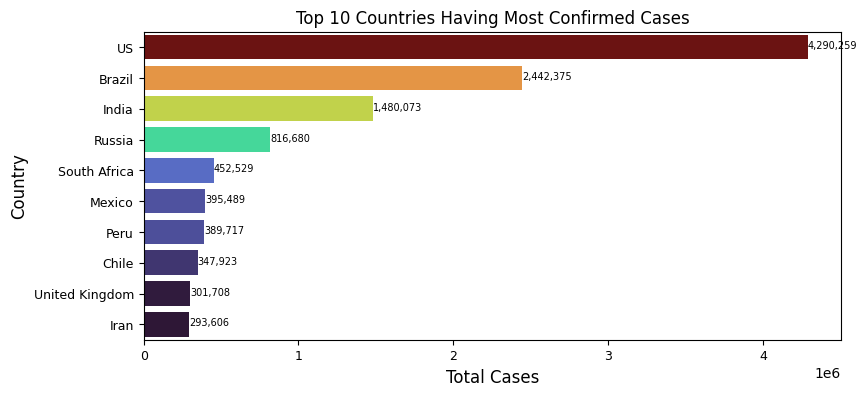

In [ ]:
# Display data as a bar plot

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Confirmed Cases" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=top10_casualities.confirmed.min(), vcenter=1000000, vmax=top10_casualities.confirmed.max())
colors = [plt.cm.turbo(norm(c)) for c in top10_casualities['confirmed']]

ax = sns.barplot(x = top10_casualities.confirmed, y = top10_casualities.country, palette=colors)
for i, (value, name) in enumerate(zip(top10_casualities.confirmed, top10_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Total Cases', ylabel = 'Country')


The horizontal bar chart above shows the 10 countries with the highest number of confirmed COVID-19 cases in the world. From the chart, we can clearly see that:

- The United States (US) has the highest number of confirmed COVID-19 cases compared to the other 9 countries listed in the chart. The number of confirmed cases in the US far exceeds those in other countries.

- The difference in the number of cases between these countries is significant. This shows that the impact of the COVID-19 pandemic varies greatly across countries.

### 4) Top 10 Countries Having Most Active Cases

In [ ]:
# Group the data by Country/Region on the latest date
top10_actives = top_latest_date.groupby(top_latest_date['country'])['active'].sum().sort_values(ascending = False).head(10).reset_index()
top10_actives.insert(loc=0, column='no', value = np.arange(len(top10_actives)) + 1)
top10_actives

no         country   active
0   1              US  2816444
1   2          Brazil   508116
2   3           India   495499
3   4  United Kingdom   254427
4   5          Russia   201097
5   6    South Africa   170537
6   7        Colombia   117163
7   8          France   108928
8   9          Canada   107514
9  10            Peru    98752

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

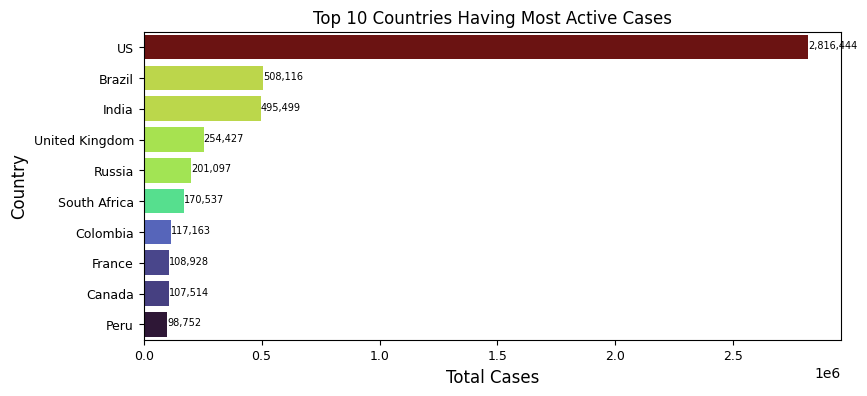

In [ ]:
# Display data as a bar plot
from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Active Cases" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=top10_actives.active.min(), vcenter=190000, vmax=top10_actives.active.max())
colors = [plt.cm.turbo(norm(c)) for c in top10_actives['active']]

ax = sns.barplot(x = top10_actives.active, y = top10_actives.country, palette=colors)
for i, (value, name) in enumerate(zip(top10_actives.active, top10_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Total Cases', ylabel = 'Country')


The horizontal bar chart above shows the 10 countries with the highest number of active COVID-19 cases globally. From this chart, we can clearly see that:

- The United States (US) remains ranked first, with the highest number of active COVID-19 cases worldwide.

- Most of the countries in the top 10 have large populations. This indicates that the number of active cases is not only influenced by public health factors but also by population size.

### 5) Top 10 Countries Having Most Deaths

In [ ]:
# Group the data by Country/Region on the latest date
top10_deaths = top_latest_date.groupby(top_latest_date['country'])['deaths'].sum().sort_values(ascending = False).head(10).reset_index()
top10_deaths.insert(loc=0, column='no', value = np.arange(len(top10_deaths)) + 1)
top10_deaths

no         country  deaths
0   1              US  148011
1   2          Brazil   87618
2   3  United Kingdom   45844
3   4          Mexico   44022
4   5           Italy   35112
5   6           India   33408
6   7          France   30212
7   8           Spain   28432
8   9            Peru   18418
9  10            Iran   15912

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

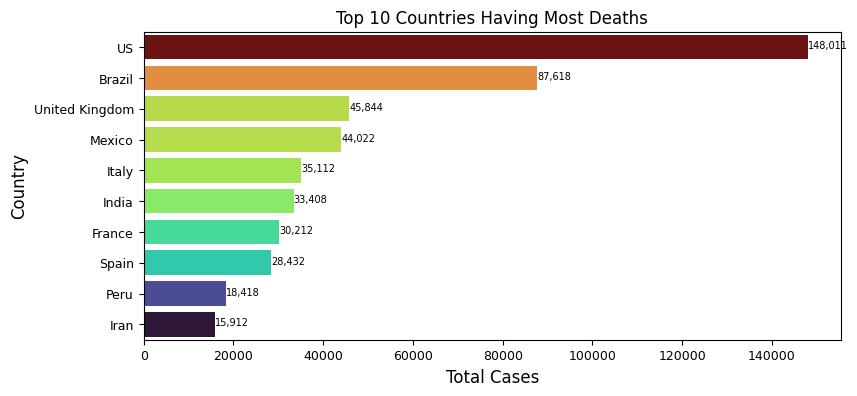

In [ ]:
# Display data as a bar plot
from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Deaths" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=top10_deaths.deaths.min(), vcenter=35000, vmax=top10_deaths.deaths.max())
colors = [plt.cm.turbo(norm(c)) for c in top10_deaths['deaths']]

ax = sns.barplot(x = top10_deaths.deaths, y = top10_deaths.country, palette=colors)
for i, (value, name) in enumerate(zip(top10_deaths.deaths, top10_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Total Cases', ylabel = 'Country')

The horizontal bar chart above shows the 10 countries with the highest number of COVID-19 deaths in the world. From the chart, we can clearly observe that:
- The United States (US) ranks first, with a significantly higher number of COVID-19 deaths compared to other countries.
- European countries such as Italy, France and Spain are also among the top 10 countries with the highest number of deaths.
- Interestingly, the United Kingdom (UK) is the 9th country for confirmed cases, in the graph above we can see that the UK has the 3rd highest number of deaths.

### 6) Top 10 Countries Having Most Recovered Cases

In [ ]:
# Group the data by Country/Region on the latest date
top10_recovered = top_latest_date.groupby(top_latest_date['country'])['recovered'].sum().sort_values(ascending = False).head(10).reset_index()
top10_recovered.insert(loc=0, column='no', value = np.arange(len(top10_recovered)) + 1)
top10_recovered

no       country  recovered
0   1        Brazil    1846641
1   2            US    1325804
2   3         India     951166
3   4        Russia     602249
4   5         Chile     319954
5   6        Mexico     303810
6   7  South Africa     274925
7   8          Peru     272547
8   9          Iran     255144
9  10      Pakistan     241026

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

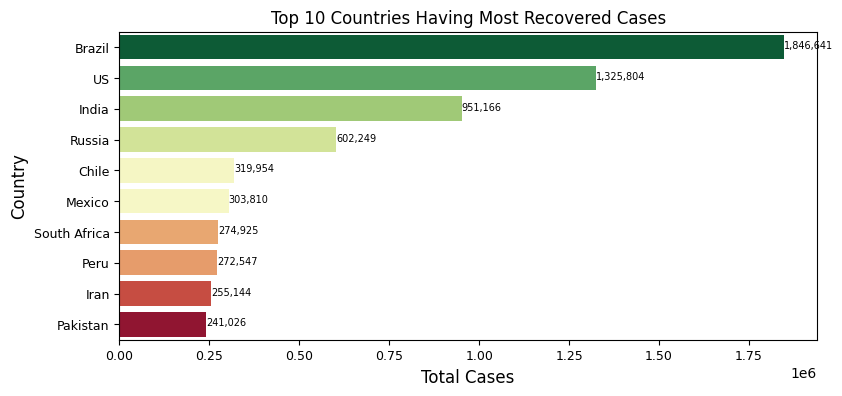

In [ ]:
# Display data as a bar plot
from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Recovered Cases" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=top10_recovered.recovered.min(), vcenter=300000, vmax=top10_recovered.recovered.max())
colors = [plt.cm.RdYlGn(norm(c)) for c in top10_recovered['recovered']]

ax = sns.barplot(x = top10_recovered.recovered, y = top10_recovered.country, palette=colors)
for i, (value, name) in enumerate(zip(top10_recovered.recovered, top10_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Total Cases', ylabel = 'Country')

The horizontal bar chart provides a clear overview of the 10 countries with the highest number of recovered COVID-19 cases. From the chart above, we can observe that:

- The analysis of the chart above indicates that countries with large populations tend to have high numbers of recovered cases. This may be due to the high number of cases occurring in these countries.

- Additionally, the chart also highlights the success of COVID-19 response in Latin American and Asian countries, such as Brazil, Mexico and India, shows that global efforts to counter the pandemic achieved positive and mixed results.

### 7) Top 10 Countries Having The Worst Mortality and Best Recovery Rate. (In Percentage)

Rate Percentage

In [ ]:
rate = top_latest_date.groupby(top_latest_date['country'])[['recovered','confirmed','deaths']].sum().reset_index()
rate['recovery percentage'] = round(((rate['recovered']) / (rate['confirmed'])) * 100 , 2)
rate['death percentage'] = round(((rate['deaths']) / (rate['confirmed'])) * 100 , 2)
rate.head()

country  recovered  confirmed  deaths  recovery percentage  \
0  Afghanistan      25198      36263    1269                69.49   
1      Albania       2745       4880     144                56.25   
2      Algeria      18837      27973    1163                67.34   
3      Andorra        803        907      52                88.53   
4       Angola        242        950      41                25.47   

   death percentage  
0              3.50  
1              2.95  
2              4.16  
3              5.73  
4              4.32

**Mortality Rate Percentage**

In [ ]:
mortality_rate = rate.groupby(rate['country'])['death percentage'].sum().sort_values(ascending = False).head(10).reset_index()
mortality_rate.insert(loc=0, column='no', value = np.arange(len(mortality_rate)) + 1)
mortality_rate

no         country  death percentage
0   1           Yemen             28.56
1   2  United Kingdom             15.19
2   3         Belgium             14.79
3   4           Italy             14.26
4   5          France             13.71
5   6         Hungary             13.40
6   7     Netherlands             11.53
7   8          Mexico             11.13
8   9           Spain             10.44
9  10  Western Sahara             10.00

[Text(0.5, 0, 'Mortality Rate in percentage'), Text(0, 0.5, 'Country')]

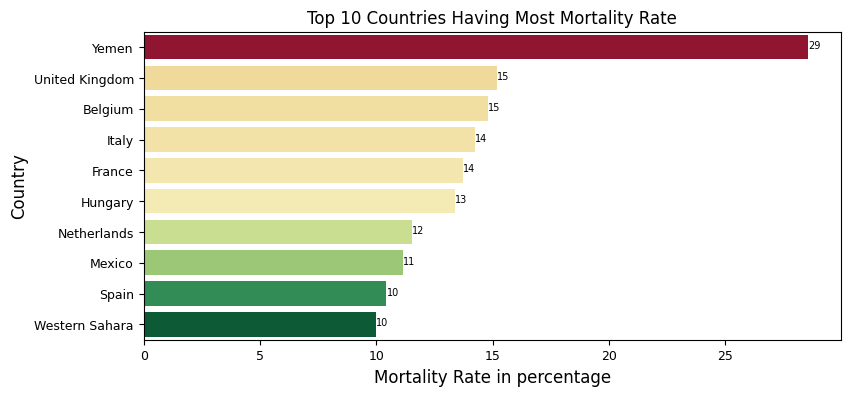

In [ ]:
# Display data as a bar plot
from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Mortality Rate" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=mortality_rate['death percentage'].min(), vcenter=12, vmax=mortality_rate['death percentage'].max())
colors = [plt.cm.RdYlGn_r(norm(c)) for c in mortality_rate['death percentage']]

ax = sns.barplot(x = mortality_rate['death percentage'], y = mortality_rate.country, palette=colors)
for i, (value, name) in enumerate(zip(mortality_rate['death percentage'], mortality_rate.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Mortality Rate in percentage', ylabel = 'Country')


The horizontal bar chart above shows the 10 countries with the highest COVID-19 mortality rates in the world. From the chart above, we can observe that:

- The analysis of the chart above indicates that countries with weaker healthcare systems and poorer socioeconomic conditions tend to have higher COVID-19 mortality rates. This is particularly evident in the case of Yemen, which has a mortality rate significantly above the average.

- In addition, European countries that generally have well-established healthcare systems, also experienced relatively high mortality rates. This also indicates that factors such as healthcare system quality, socioeconomic conditions, and government policies can significantly impact COVID-19 mortality rates.

**Recovery Rate Percentage**

In [ ]:
recovery_rate = rate.groupby(rate['country'])['recovery percentage'].sum().sort_values(ascending = False).head(10).reset_index()
recovery_rate.insert(loc=0, column='no', value = np.arange(len(recovery_rate)) + 1)
recovery_rate

no      country  recovery percentage
0   1     Holy See               100.00
1   2      Grenada               100.00
2   3     Dominica               100.00
3   4     Djibouti                98.38
4   5      Iceland                98.33
5   6       Brunei                97.87
6   7  New Zealand                97.24
7   8        Qatar                97.02
8   9     Malaysia                96.60
9  10    Mauritius                96.51

[Text(0.5, 0, 'Recovery Rate in percentage'), Text(0, 0.5, 'Country')]

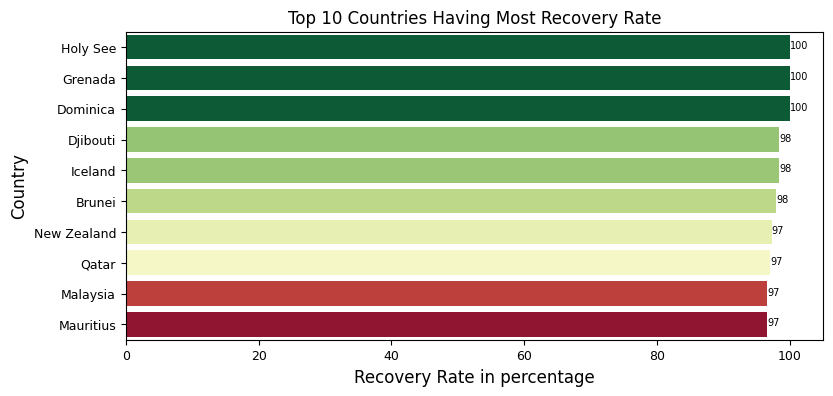

In [ ]:
# Display data as a bar plot
from matplotlib.colors import TwoSlopeNorm
from matplotlib import colors

plt.figure(figsize= (9, 4))
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.xlabel('Total Cases', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.title("Top 10 Countries Having Most Recovery Rate" , fontsize = 12)

norm = colors.TwoSlopeNorm(vmin=recovery_rate['recovery percentage'].min(), vcenter=97, vmax=recovery_rate['recovery percentage'].max())
colors = [plt.cm.RdYlGn(norm(c)) for c in recovery_rate['recovery percentage']]

ax = sns.barplot(x = recovery_rate['recovery percentage'], y = recovery_rate.country, palette=colors)
for i, (value, name) in enumerate(zip(recovery_rate['recovery percentage'], recovery_rate.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size = 7, ha = 'left',  va = 'center')
ax.set(xlabel = 'Recovery Rate in percentage', ylabel = 'Country')

The horizontal bar chart above shows the 10 countries with the highest COVID-19 recovery rates in the world. From the chart above, we can observe that:

- All the countries listed above have very high recovery rates, above 97%. This means that the majority of people infected with COVID-19 in these countries have successfully recovered.

- Upon further analysis, small countries such as the Holy See, Grenada, and Dominica lead with recovery rates of almost 100%. These results show that despite facing different challenges, these countries have successfully implemented effective strategies to manage the pandemic.

### 8) Analyse The Case Impact Of Each Continent

#### a. Create continent categories from country names

In [ ]:
# Function to convert country name to Alpha-2 code
def country_to_alpha2(country_name):
    try:
        return pc.country_name_to_country_alpha2(country_name)
    except:
        return None

# Function to convert Alpha-2 country codes to continents
def country_to_continent(country_name):
    try:
        alpha2_code = country_to_alpha2(country_name)
        if alpha2_code:
            continent_code = pc.country_alpha2_to_continent_code(alpha2_code)
            # Konversi kode benua ke nama benua
            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            return continent_name
        return None
    except:
        return None

In [ ]:
# Copy DataFrame and add continent column
continent_full_table = full_table.copy()
continent_full_table['continent'] = continent_full_table['country'].apply(country_to_continent)

# Rearrange the columns so that continent column comes second
# First, take the list of column names
columns_1 = list(continent_full_table.columns)

# Move the position of columns
columns_1.insert(1, columns_1.pop(columns_1.index('continent')))
columns_1.insert(10, columns_1.pop(columns_1.index('lat')))
columns_1.insert(11, columns_1.pop(columns_1.index('long')))
columns_1.insert(8, columns_1.pop(columns_1.index('total_cases')))

# Reorder the dataframe based on the new column order
continent_full_table = continent_full_table[columns_1]
continent_full_table

state continent                country       date  confirmed  deaths  \
0                Asia            Afghanistan 2020-01-22          0       0   
1              Europe                Albania 2020-01-22          0       0   
2              Africa                Algeria 2020-01-22          0       0   
3              Europe                Andorra 2020-01-22          0       0   
4              Africa                 Angola 2020-01-22          0       0   
...     ...       ...                    ...        ...        ...     ...   
49063          Africa  Sao Tome and Principe 2020-07-27        865      14   
49064            Asia                  Yemen 2020-07-27       1691     483   
49065          Africa                Comoros 2020-07-27        354       7   
49066            Asia             Tajikistan 2020-07-27       7235      60   
49067          Africa                Lesotho 2020-07-27        505      12   

       recovered  active  total_cases                 region        lat  \
0              0       0            0  Eastern Mediterranean  33.939110   
1              0       0            0                 Europe  41.153300   
2              0       0            0                 Africa  28.033900   
3              0       0            0                 Europe  42.506300   
4              0       0            0                 Africa -11.202700   
...          ...     ...          ...                    ...        ...   
49063        734     117         1613                 Africa   0.186400   
49064        833     375         3007  Eastern Mediterranean  15.552727   
49065        328      19          689                 Africa -11.645500   
49066       6028    1147        13323                 Europe  38.861000   
49067        128     365          645                 Africa -29.610000   

            long  
0      67.709953  
1      20.168300  
2       1.659600  
3       1.521800  
4      17.873900  
...          ...  
49063   6.613100  
49064  48.516388  
49065  43.333300  
49066  71.276100  
49067  28.233600  

[49068 rows x 12 columns]

#### b. Percentage comparison of all cases for each continent

In [ ]:
continents = continent_full_table.groupby(continent_full_table['continent'])[['confirmed', 'active', 'deaths', 'recovered']].sum().reset_index()
continents

continent  confirmed    active    deaths  recovered
0         Africa   27114381  13154537    684014   13275830
1           Asia  175239027  58335709   4614509  112288809
2         Europe  221067463  98187345  18687076  104193042
3  North America   33284907  15723532   2666043   14895332
4        Oceania    1139677    262356     13570     863751
5  South America  144631846  53127940   5681838   85822068

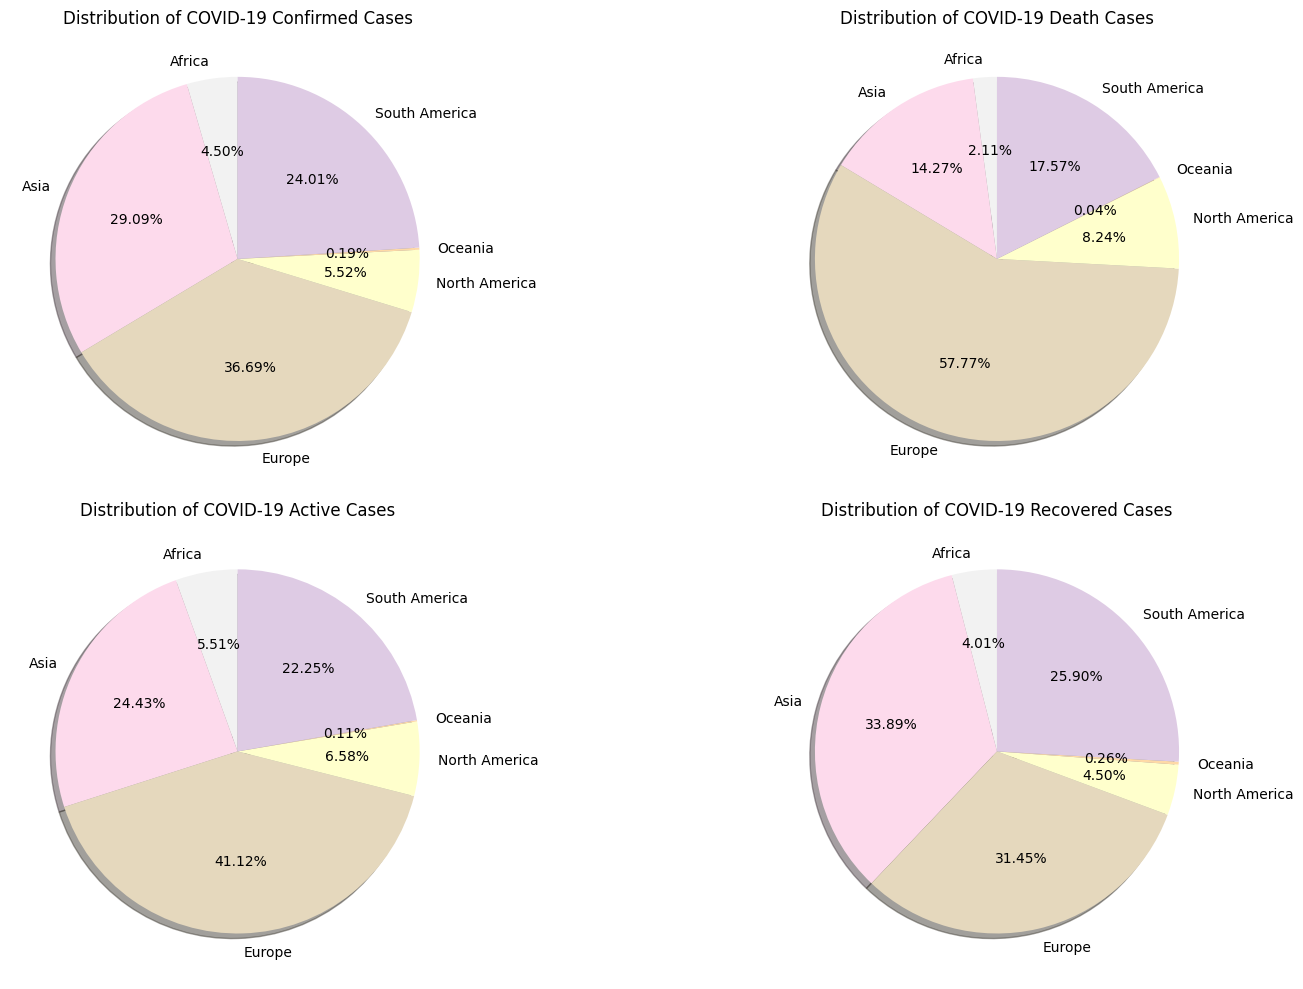

In [ ]:
# Setup plot
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

# Pie Chart for Confirmed Cases
axes[0, 0].pie(continents['confirmed'], labels=continents['continent'], shadow=True, autopct='%1.2f%%', startangle=90, colors=plt.cm.Pastel1_r.colors)
axes[0, 0].set_title('Distribution of COVID-19 Confirmed Cases')

# Pie Chart for Death Cases
axes[0, 1].pie(continents['deaths'], labels=continents['continent'], shadow=True, autopct='%1.2f%%', startangle=90, colors=plt.cm.Pastel1_r.colors)
axes[0, 1].set_title('Distribution of COVID-19 Death Cases')

# Pie Chart for Active Cases
axes[1, 0].pie(continents['active'], labels=continents['continent'], shadow=True, autopct='%1.2f%%', startangle=90, colors=plt.cm.Pastel1_r.colors)
axes[1, 0].set_title('Distribution of COVID-19 Active Cases')

# Pie Chart for Recovered Cases
axes[1, 1].pie(continents['recovered'], labels=continents['continent'], shadow=True, autopct='%1.2f%%', startangle=90, colors=plt.cm.Pastel1_r.colors)
axes[1, 1].set_title('Distribution of COVID-19 Recovered Cases')

# Menyempurnakan tampilan plot
plt.tight_layout()
plt.show()

There are four pie charts in the graph above, and these charts ilustrating the distribution of COVID-19 confirmed cases, death cases, active cases, and recovered cases by continent. From the pie charts above, we can observe that :

1. **Confirmed Cases**: Europe has the highest share of confirmed COVID-19 cases at 36.69%, followed by Asia at 29.09% and South America at 24.01%. Oceania has the lowest percentage, with only 0.19% of the total cases.

2. **Death Cases** : Europe also leads in the percentage of COVID-19 deaths, making up 57.77% of global fatalities, with South America and Asia following at 17.57% and 14.27%, respectively. Oceania has the smallest proportion of deaths at just 0.04%.

3. **Active Cases** : Europe accounts for the largest proportion of active COVID-19 cases at 41.12%, while Asia has 24.43% and South America 22.25%. Oceania again has the lowest percentage, with only 0.11%.

4. **Recovered Cases** : Asia has the highest recovery rate, contributing 33.89% of recovered cases worldwide. Europe and South America follow with 31.45% and 25.90%, respectively, while Oceania has a minimal share of 0.26%.

Overall, the data shows Europe and Asia as the primary contributors to both COVID-19 cases and recoveries, with Europe experiencing a notably high share of deaths, while Oceania consistently maintains the lowest proportions across all categories.

## **6. Animated Bar Chart Race For ASEAN Countries**

In this case, I will calculate the number of new cases for each country.

In [ ]:
newcases_df = continent_full_table.sort_values(by=['country', 'date'])

# Calculates new_cases based on the difference of total_cases
newcases_df['new_cases'] = newcases_df.groupby('country')['total_cases'].diff().fillna(0)

# Change the data type of the new_cases column from float to integer
newcases_df['new_cases'] = newcases_df['new_cases'].astype(int)

# Reorder the columns so that the new_cases column is next to the total_cases column
# First, take the list of column names
columns_2 = list(newcases_df.columns)

# Move the position of columns
columns_2.insert(9, columns_2.pop(columns_2.index('new_cases')))

# Reorder the dataframe based on the new column order
newcases_df = newcases_df[columns_2]
newcases_df

state continent      country       date  confirmed  deaths  recovered  \
0                Asia  Afghanistan 2020-01-22          0       0          0   
261              Asia  Afghanistan 2020-01-23          0       0          0   
522              Asia  Afghanistan 2020-01-24          0       0          0   
783              Asia  Afghanistan 2020-01-25          0       0          0   
1044             Asia  Afghanistan 2020-01-26          0       0          0   
...     ...       ...          ...        ...        ...     ...        ...   
47991          Africa     Zimbabwe 2020-07-23       2124      28        510   
48252          Africa     Zimbabwe 2020-07-24       2296      32        514   
48513          Africa     Zimbabwe 2020-07-25       2434      34        518   
48774          Africa     Zimbabwe 2020-07-26       2512      34        518   
49035          Africa     Zimbabwe 2020-07-27       2704      36        542   

       active  total_cases  new_cases                 region        lat  \
0           0            0          0  Eastern Mediterranean  33.939110   
261         0            0          0  Eastern Mediterranean  33.939110   
522         0            0          0  Eastern Mediterranean  33.939110   
783         0            0          0  Eastern Mediterranean  33.939110   
1044        0            0          0  Eastern Mediterranean  33.939110   
...       ...          ...        ...                    ...        ...   
47991    1586         2662         92                 Africa -19.015438   
48252    1750         2842        180                 Africa -19.015438   
48513    1882         2986        144                 Africa -19.015438   
48774    1960         3064         78                 Africa -19.015438   
49035    2126         3282        218                 Africa -19.015438   

            long  
0      67.709953  
261    67.709953  
522    67.709953  
783    67.709953  
1044   67.709953  
...          ...  
47991  29.154857  
48252  29.154857  
48513  29.154857  
48774  29.154857  
49035  29.154857  

[49068 rows x 13 columns]

Here I want to see the data for the country, date, and new_cases columns

In [ ]:
country_newcases = newcases_df[['country', 'date', 'new_cases']]
country_newcases

country       date  new_cases
0      Afghanistan 2020-01-22          0
261    Afghanistan 2020-01-23          0
522    Afghanistan 2020-01-24          0
783    Afghanistan 2020-01-25          0
1044   Afghanistan 2020-01-26          0
...            ...        ...        ...
47991     Zimbabwe 2020-07-23         92
48252     Zimbabwe 2020-07-24        180
48513     Zimbabwe 2020-07-25        144
48774     Zimbabwe 2020-07-26         78
49035     Zimbabwe 2020-07-27        218

[49068 rows x 3 columns]

I pivoted the table to make the country name as a column

In [ ]:
# I used the aggregate function "SUM" to sum up all the new cases that may occur on the same date for the same country.
pivot_newcases = country_newcases.pivot_table(index='date',
                                                 columns='country',
                                                 values='new_cases',
                                                 aggfunc='sum')\
                                                 .reset_index().rename_axis(None, axis=1)

pivot_newcases

date  Afghanistan  Albania  Algeria  Andorra  Angola  \
0   2020-01-22            0        0        0        0       0   
1   2020-01-23            0        0        0        0       0   
2   2020-01-24            0        0        0        0       0   
3   2020-01-25            0        0        0        0       0   
4   2020-01-26            0        0        0        0       0   
..         ...          ...      ...      ...      ...     ...   
183 2020-07-23          848      171     1011        0      54   
184 2020-07-24          119      194      687        8      36   
185 2020-07-25          269      102     1322        0      41   
186 2020-07-26          519      175      614        0      17   
187 2020-07-27          134      186     1373       10      19   

     Antigua and Barbuda  Argentina  Armenia  Australia  ...  United Kingdom  \
0                      0          0        0          0  ...               0   
1                      0          0        0          0  ...               0   
2                      0          0        0          0  ...               0   
3                      0          0        0          0  ...               0   
4                      0          0        0          0  ...               0   
..                   ...        ...      ...        ...  ...             ...   
183                    0       8525      957          8  ...               0   
184                    8       8230      945         13  ...               0   
185                    0       7475      900          4  ...               0   
186                    0       6734      561          3  ...               0   
187                    9       7067      266          1  ...               0   

     Uruguay  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  \
0          0           0          0        0                   0   
1          0           0          0        2                   0   
2          0           0          0        0                   0   
3          0           0          0        0                   0   
4          0           0          0        0                   0   
..       ...         ...        ...      ...                 ...   
183       30         889        735        4                1117   
184       31         700       1030        3                 352   
185        9         956       1338        2                 780   
186       19         858       1489        3                 634   
187       14        1252        742       11                 154   

     Western Sahara  Yemen  Zambia  Zimbabwe  
0                 0      0       0         0  
1                 0      0       0         0  
2                 0      0       0         0  
3                 0      0       0         0  
4                 0      0       0         0  
..              ...    ...     ...       ...  
183               0     28     212        92  
184               0     45      69       180  
185               0      6     751       144  
186               0     29     550        78  
187               0     50     537       218  

[188 rows x 188 columns]

Here I only want to create data visualisations for countries in Southeast Asia, which are Indonesia, Malaysia, Singapore, Thailand, Philippines, Vietnam, Brunei Darussalam, Laos, Myanmar/Burma, Cambodia, and Timor Leste. Let’s keep only these 10 countries in dataframe and drop all the rest:

In [ ]:
asean_df = pivot_newcases[['date',
                           'Indonesia',
                           'Malaysia',
                           'Singapore',
                           'Thailand',
                           'Philippines',
                           'Vietnam',
                           'Brunei',
                           'Laos',
                           'Burma',
                           'Cambodia',
                           'Timor-Leste']]
asean_df

date  Indonesia  Malaysia  Singapore  Thailand  Philippines  \
0   2020-01-22          0         0          0         0            0   
1   2020-01-23          0         0          1         1            0   
2   2020-01-24          0         0          2         2            0   
3   2020-01-25          0         3          0         2            0   
4   2020-01-26          0         1          1         3            0   
..         ...        ...       ...        ...       ...          ...   
183 2020-07-23       3932        17        574        20         2909   
184 2020-07-24       3631        24        434         0         2181   
185 2020-07-25       3326        40        693         5         3236   
186 2020-07-26       2860        20        650         9         2429   
187 2020-07-27       3100         8        640         8         1941   

     Vietnam  Brunei  Laos  Burma  Cambodia  Timor-Leste  
0          0       0     0      0         0            0  
1          2       0     0      0         0            0  
2          0       0     0      0         0            0  
3          0       0     0      0         0            0  
4          0       0     0      0         0            0  
..       ...     ...   ...    ...       ...          ...  
183        4       0     0      0         4            0  
184        3       0     1      9         0            0  
185        2       0     0      4        24            0  
186        3       0     0      4         0            0  
187       11       0     0      2         5            0  

[188 rows x 12 columns]

In [ ]:
# View the total null values in each column
null_counts = asean_df.isnull().sum()

print("The total null values in each column:")
print(null_counts)

The total null values in each column:
date           0
Indonesia      0
Malaysia       0
Singapore      0
Thailand       0
Philippines    0
Vietnam        0
Brunei         0
Laos           0
Burma          0
Cambodia       0
Timor-Leste    0
dtype: int64


I want to reformat the dates in the dataframe

In [ ]:
# Change the date column format. ("January 01, 2020")
asean_df['date'] = asean_df['date'].dt.strftime('%B %d, %Y')
asean_df = asean_df[['date', 'Indonesia', 'Malaysia', 'Singapore',
                     'Thailand', 'Philippines', 'Vietnam', 'Brunei',
                     'Laos', 'Burma', 'Cambodia', 'Timor-Leste']]
asean_df

date  Indonesia  Malaysia  Singapore  Thailand  Philippines  \
0    January 22, 2020          0         0          0         0            0   
1    January 23, 2020          0         0          1         1            0   
2    January 24, 2020          0         0          2         2            0   
3    January 25, 2020          0         3          0         2            0   
4    January 26, 2020          0         1          1         3            0   
..                ...        ...       ...        ...       ...          ...   
183     July 23, 2020       3932        17        574        20         2909   
184     July 24, 2020       3631        24        434         0         2181   
185     July 25, 2020       3326        40        693         5         3236   
186     July 26, 2020       2860        20        650         9         2429   
187     July 27, 2020       3100         8        640         8         1941   

     Vietnam  Brunei  Laos  Burma  Cambodia  Timor-Leste  
0          0       0     0      0         0            0  
1          2       0     0      0         0            0  
2          0       0     0      0         0            0  
3          0       0     0      0         0            0  
4          0       0     0      0         0            0  
..       ...     ...   ...    ...       ...          ...  
183        4       0     0      0         4            0  
184        3       0     1      9         0            0  
185        2       0     0      4        24            0  
186        3       0     0      4         0            0  
187       11       0     0      2         5            0  

[188 rows x 12 columns]

Before creating the bar chart race is to make the date column into an index column. This is useful for data grouping, and time sequencing, resulting in more informative and accurate visualisations.

In [ ]:
# Change the date column to index
asean_df.set_index('date', inplace = True)
asean_df

Indonesia  Malaysia  Singapore  Thailand  Philippines  \
date                                                                      
January 22, 2020          0         0          0         0            0   
January 23, 2020          0         0          1         1            0   
January 24, 2020          0         0          2         2            0   
January 25, 2020          0         3          0         2            0   
January 26, 2020          0         1          1         3            0   
...                     ...       ...        ...       ...          ...   
July 23, 2020          3932        17        574        20         2909   
July 24, 2020          3631        24        434         0         2181   
July 25, 2020          3326        40        693         5         3236   
July 26, 2020          2860        20        650         9         2429   
July 27, 2020          3100         8        640         8         1941   

                  Vietnam  Brunei  Laos  Burma  Cambodia  Timor-Leste  
date                                                                   
January 22, 2020        0       0     0      0         0            0  
January 23, 2020        2       0     0      0         0            0  
January 24, 2020        0       0     0      0         0            0  
January 25, 2020        0       0     0      0         0            0  
January 26, 2020        0       0     0      0         0            0  
...                   ...     ...   ...    ...       ...          ...  
July 23, 2020           4       0     0      0         4            0  
July 24, 2020           3       0     1      9         0            0  
July 25, 2020           2       0     0      4        24            0  
July 26, 2020           3       0     0      4         0            0  
July 27, 2020          11       0     0      2         5            0  

[188 rows x 11 columns]

The cases in the current dataframe are daily recorded cases. Instead, what is needed is the cumulative number of all cases for each country. To get the sum of the cumulative cases, use the following code:

In [ ]:
# Count the cumulative sum of each column
cumulativesum_df = asean_df.cumsum(axis = 0)

# Check if the cumulative sum is working properly by looking at the bottom row of each column
cumulativesum_df.tail()

Indonesia  Malaysia  Singapore  Thailand  Philippines  Vietnam  \
date                                                                            
July 23, 2020     150397     17537      94140      6442       100644      777   
July 24, 2020     154028     17561      94574      6442       102825      780   
July 25, 2020     157354     17601      95267      6447       106061      782   
July 26, 2020     160214     17621      95917      6456       108490      785   
July 27, 2020     163314     17629      96557      6464       110431      796   

               Brunei  Laos  Burma  Cambodia  Timor-Leste  
date                                                       
July 23, 2020     282    38    629       344           24  
July 24, 2020     282    39    638       344           24  
July 25, 2020     282    39    642       368           24  
July 26, 2020     282    39    646       368           24  
July 27, 2020     282    39    648       373           24

In [ ]:
def summary(values, ranks):
    total_cases = values.sum()
    s = f"Total cases - {total_cases:,.0f}"
    return {'x': .75, 'y': .05, 's': s, 'size': 8}

In [ ]:
bcr.bar_chart_race(df = cumulativesum_df,
                   filename = None,
                   period_summary_func = summary,
                   period_label = {'x':.75, 'y': .1},
                   title = 'Covid-19 cases in ASEAN countries (Jan 22 - Jul 27)')

From the Animated Bar Chart Race, we can see that from the beginning of the year, around January to March, the impact of the Covid-19 case in ASEAN grew rapidly in Singapore. Then, from mid-March to April, Malaysia experienced a surge in cases, making it the first country in ASEAN to have the highest number of Covid-19 cases.  However, the most surprising thing was that from early June to July, Indonesia became the country with the highest surge in Covid-19 cases in ASEAN, far surpassing other countries. The possibility is that what happened in that country was a less serious Covid-19 handling system, or perhaps it was because Indonesia is the ASEAN country with the largest population.

## **7. Conclusions**

There are several conclusions that can be drawn from all the steps taken above:
- This notebook aims to analyze the global spread of COVID-19 using data covering the period from January 22, 2020 to July 27, 2020. The analysis focuses on the distribution patterns of cases based on geographic regions (continents and countries).

- Utilizing visualization libraries like **`matplotlib`** or **`bar_chart_race`** to present data in an interactive and visual manner.

- Pie charts or bar charts provide a static overview, showing the contribution of each continent to the total global cases.

- The bar chart race visualization shows the dynamic progression of cases over time, helping to understand the spread patterns across different countries and continents.

- In data analysis, it is not enough to have technical skills but also important to have insights into how data can be used to understand global issues such as pandemics.

